# **Projeto Acidentes em Rodovias Federais**

##### Notebook Destinado a limpeza de dados

In [544]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm


In [545]:
df = pd.read_csv("../data/datatran2024.csv", encoding='iso-8859-1', delimiter=";")

In [546]:
warnings.simplefilter(action='ignore', category=FutureWarning)

In [547]:
print(df.shape)

(73156, 30)


In [548]:
df.columns

Index(['id', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km',
       'municipio', 'causa_acidente', 'tipo_acidente',
       'classificacao_acidente', 'fase_dia', 'sentido_via',
       'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo',
       'pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos',
       'ignorados', 'feridos', 'veiculos', 'latitude', 'longitude', 'regional',
       'delegacia', 'uop'],
      dtype='object')

In [549]:
df.drop_duplicates(inplace=True)

In [550]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73156 entries, 0 to 73155
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      73156 non-null  float64
 1   data_inversa            73156 non-null  object 
 2   dia_semana              73156 non-null  object 
 3   horario                 73156 non-null  object 
 4   uf                      73156 non-null  object 
 5   br                      73156 non-null  int64  
 6   km                      73156 non-null  object 
 7   municipio               73156 non-null  object 
 8   causa_acidente          73156 non-null  object 
 9   tipo_acidente           73156 non-null  object 
 10  classificacao_acidente  73155 non-null  object 
 11  fase_dia                73156 non-null  object 
 12  sentido_via             73156 non-null  object 
 13  condicao_metereologica  73156 non-null  object 
 14  tipo_pista              73156 non-null

In [551]:
pd.set_option('display.max_columns', None)
df.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,571789.0,2024-01-01,segunda-feira,03:56:00,ES,101,38,CONCEICAO DA BARRA,Ultrapassagem Indevida,Colisão lateral sentido oposto,NaN,Plena Noite,Crescente,Céu Claro,Simples,Reta,Não,3,0,0,1,1,1,1,3,-18.482610,-39.923790,SPRF-ES,DEL04-ES,UOP02-DEL04-ES
1,571804.0,2024-01-01,segunda-feira,04:50:00,PI,343,185,PIRIPIRI,Manobra de mudança de faixa,Colisão frontal,Com Vítimas Fatais,Amanhecer,Decrescente,Céu Claro,Simples,Reta,Sim,2,1,0,0,1,0,0,2,-4.296033,-41.767327,SPRF-PI,DEL02-PI,UOP01-DEL02-PI
2,571806.0,2024-01-01,segunda-feira,04:30:00,BA,116,578,BREJOES,Ingestão de álcool pelo condutor,Colisão frontal,Com Vítimas Fatais,Plena Noite,Decrescente,Céu Claro,Simples,Curva,Não,3,1,0,0,1,2,0,4,-13.071583,-39.961111,SPRF-BA,DEL03-BA,UOP02-DEL03-BA
3,571818.0,2024-01-01,segunda-feira,06:30:00,SE,101,18,MALHADA DOS BOIS,Reação tardia ou ineficiente do condutor,Saída de leito carroçável,Com Vítimas Feridas,Amanhecer,Crescente,Céu Claro,Dupla,Declive;Reta,Não,2,0,0,1,0,2,1,3,-10.356019,-36.905522,SPRF-SE,DEL02-SE,UOP02-DEL02-SE
4,571838.0,2024-01-01,segunda-feira,05:00:00,MT,364,240,RONDONOPOLIS,Condutor deixou de manter distância do veículo...,Colisão traseira,Sem Vítimas,Pleno dia,Crescente,Céu Claro,Dupla,Reta,Não,3,0,0,0,2,1,0,3,-16.179141,-54.789053,SPRF-MT,DEL02-MT,UOP01-DEL02-MT


In [552]:
df.columns

Index(['id', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km',
       'municipio', 'causa_acidente', 'tipo_acidente',
       'classificacao_acidente', 'fase_dia', 'sentido_via',
       'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo',
       'pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos',
       'ignorados', 'feridos', 'veiculos', 'latitude', 'longitude', 'regional',
       'delegacia', 'uop'],
      dtype='object')

In [553]:
df.describe()

,id,br,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude
count,73156.000000,73156.000000,73156.000000,73156.000000,73156.000000,73156.000000,73156.000000,73156.000000,73156.000000,73156.000000,73156.000000,73156.000000
mean,613003.770340,209.575004,2.597162,0.084204,0.877331,0.278091,1.048103,0.395661,1.155421,1.985811,-18.810858,-46.395744
std,23344.408649,128.818508,2.232573,0.372804,1.126993,0.635996,1.746499,0.822872,1.253310,1.083471,7.722916,6.214783
min,571772.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-33.680584,-72.641548
25%,593042.750000,101.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-25.103899,-50.212551
50%,613246.500000,158.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000,-20.411868,-47.009041
75%,633190.250000,324.000000,3.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000,-12.588467,-42.184893
max,661607.000000,495.000000,93.000000,37.000000,83.000000,35.000000,78.000000,33.000000,84.000000,26.000000,4.449203,-32.406822


In [554]:
df.loc[0][0:15]

id                                              571789.0
data_inversa                                  2024-01-01
dia_semana                                 segunda-feira
horario                                         03:56:00
uf                                                    ES
br                                                   101
km                                                    38
municipio                             CONCEICAO DA BARRA
causa_acidente                    Ultrapassagem Indevida
tipo_acidente             Colisão lateral sentido oposto
classificacao_acidente                               NaN
fase_dia                                     Plena Noite
sentido_via                                    Crescente
condicao_metereologica                         Céu Claro
tipo_pista                                       Simples
Name: 0, dtype: object

Diversos erros nos dados podem ser encontrados, como formatação e colunas desnecessárias

#### **Escolhendo colunas para o modelo**

In [555]:
df = df[['dia_semana', 'horario', 'uf', 'br', 'causa_acidente', 'tipo_acidente', 'tipo_pista', 'uso_solo', 'pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos', 'feridos']]

In [556]:
print(df.shape)

(73156, 14)


**Verificando se há valores nulos**

In [557]:
valores_vazios = df.isna().sum()
valores_vazios[valores_vazios > 0]

Series([], dtype: int64)

### **Tratando valores vazios**

Tipo Acidente

In [558]:
df['tipo_acidente'].value_counts()

tipo_acidente
Colisão traseira                  13960
Saída de leito carroçável         10827
Colisão transversal                9385
Colisão lateral mesmo sentido      7902
Tombamento                         6442
Colisão com objeto                 5118
Colisão frontal                    4862
Queda de ocupante de veículo       3349
Atropelamento de Pedestre          3167
Colisão lateral sentido oposto     2028
Incêndio                           1717
Capotamento                        1469
Atropelamento de Animal            1285
Engavetamento                      1224
Eventos atípicos                    299
Derramamento de carga               110
Sinistro pessoal de trânsito         12
Name: count, dtype: int64

In [559]:
#Atribuindo a moda para o valor faltante
df.fillna({
    'tipo_acidente' : 'Colisão traseira'
}, inplace=True)

In [560]:
df.dtypes[:20]

dia_semana        object
horario           object
uf                object
br                 int64
causa_acidente    object
tipo_acidente     object
tipo_pista        object
uso_solo          object
pessoas            int64
mortos             int64
feridos_leves      int64
feridos_graves     int64
ilesos             int64
feridos            int64
dtype: object

O tipo object significa que pode haver dois ou mais tipos de dados misturados

***Formatando os tipos de dados***

In [561]:
# Observando o formato dos dados
df['horario'].value_counts()

horario
19:00:00    1117
18:00:00    1022
18:30:00     909
17:00:00     856
08:00:00     823
            ... 
02:06:00       1
00:58:00       1
03:01:00       1
06:33:00       1
02:07:00       1
Name: count, Length: 1415, dtype: int64

**Coluna uf**

In [562]:
df['uf'].value_counts()

uf
MG    9296
SC    8381
PR    7576
RJ    6389
RS    5206
SP    4883
BA    4151
GO    3305
PE    3230
MT    2554
ES    2395
PB    1920
MS    1803
RN    1606
PI    1520
CE    1500
RO    1483
MA    1138
DF    1056
PA     970
TO     735
AL     712
SE     597
AC     287
AM     169
AP     159
RR     135
Name: count, dtype: int64

In [563]:
df['uf'] = df['uf'].astype(str)

<Axes: ylabel='dia_semana'>

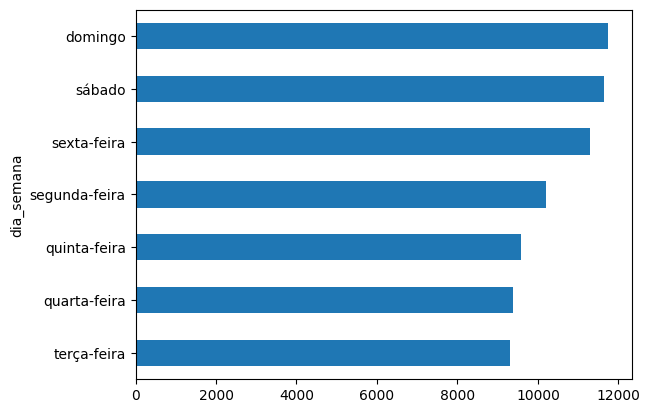

In [564]:
df['dia_semana'].value_counts(ascending=True).plot(kind="barh")

In [565]:
df['dia_semana'] = df['dia_semana'].astype(str)

**Coluna BR**

In [566]:
# Convertendo para string

df['br'] = 'BR-' + df['br'].astype(int).astype(str)

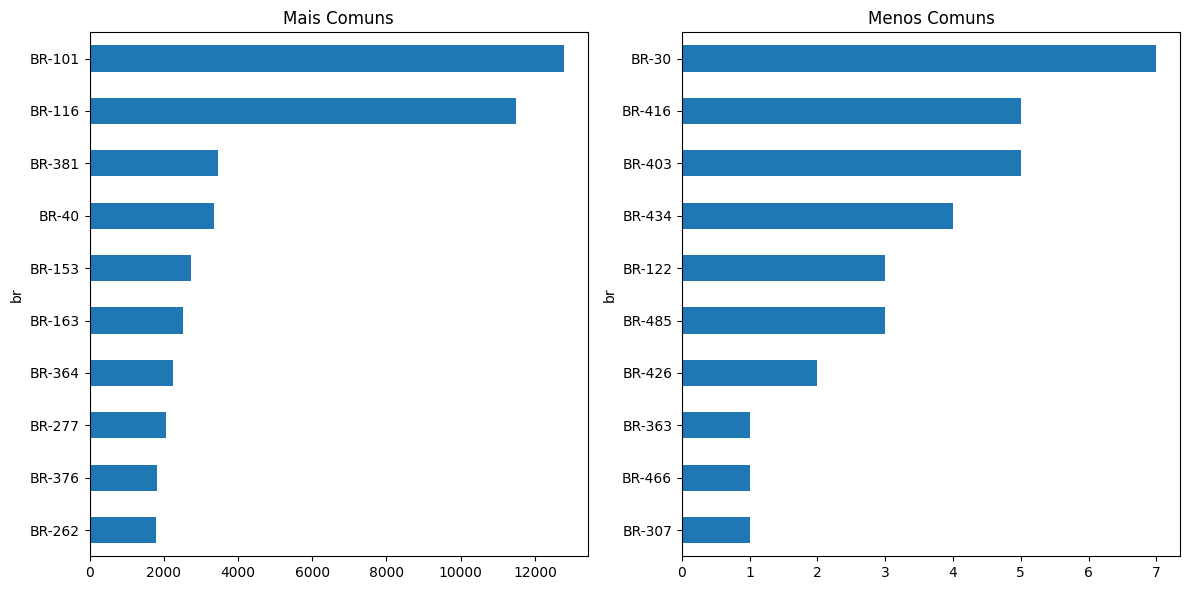

In [567]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

df['br'].value_counts(ascending=True)[df["br"].unique().shape[0] - 10:].plot(kind="barh", ax=axs[0])
axs[0].set_title('Mais Comuns')

# Gráfico dos últimos 10 registros
df['br'].value_counts(ascending=True)[:10].plot(kind="barh", ax=axs[1])
axs[1].set_title('Menos Comuns')

plt.tight_layout()
plt.show()

**Coluna Causa_acidente**

In [568]:
df['causa_acidente'].value_counts()

causa_acidente
Reação tardia ou ineficiente do condutor                     10920
Ausência de reação do condutor                               10664
Acessar a via sem observar a presença dos outros veículos     6958
Condutor deixou de manter distância do veículo da frente      4460
Velocidade Incompatível                                       4347
                                                             ...  
Restrição de visibilidade em curvas verticais                    7
Faróis desregulados                                              5
Sistema de drenagem ineficiente                                  4
Sinalização encoberta                                            3
Redutor de velocidade em desacordo                               3
Name: count, Length: 69, dtype: int64

In [569]:
df['tipo_pista'].value_counts()

tipo_pista
Simples     35287
Dupla       30730
Múltipla     7139
Name: count, dtype: int64

<Axes: ylabel='count'>

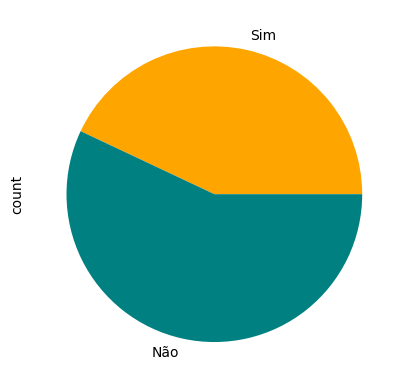

In [570]:
df['uso_solo'].value_counts(ascending=True).plot(kind="pie", colors=["orange", "teal"])

In [571]:
# Substituindo o valor 'sim' por urbano e 'Não' por rural
# Essas informações estão disponíveis no dicionário de dados da PRF

df['uso_solo'] = df['uso_solo'].replace({'Sim': 'Urbano', 'Não': 'Rural'})

In [572]:
df['uso_solo'] = df['uso_solo'].astype(str)

In [573]:
# Observando os faltantes

faltantes = df.loc[(df['ilesos'] == 0) & (df['feridos_leves'] == 0) & (df['feridos_graves'] == 0) & (df['mortos'] == 0)]
faltantes

,dia_semana,horario,uf,br,causa_acidente,tipo_acidente,tipo_pista,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,feridos
57,quarta-feira,01:30:00,MA,BR-222,Ausência de reação do condutor,Saída de leito carroçável,Simples,Rural,2,0,0,0,0,0
555,segunda-feira,09:00:00,BA,BR-110,Reação tardia ou ineficiente do condutor,Saída de leito carroçável,Simples,Urbano,1,0,0,0,0,0
1105,sábado,04:50:00,PE,BR-232,Condutor deixou de manter distância do veículo...,Incêndio,Dupla,Rural,2,0,0,0,0,0
1297,quarta-feira,11:51:00,PE,BR-101,Ausência de reação do condutor,Colisão com objeto,Dupla,Urbano,1,0,0,0,0,0
2046,sábado,18:20:00,SP,BR-116,Ausência de reação do condutor,Colisão traseira,Múltipla,Urbano,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72818,terça-feira,10:25:00,PR,BR-277,Avarias e/ou desgaste excessivo no pneu,Tombamento,Simples,Rural,2,0,0,0,0,0
72849,terça-feira,08:00:00,BA,BR-242,Reação tardia ou ineficiente do condutor,Colisão traseira,Simples,Rural,2,0,0,0,0,0
72893,terça-feira,21:40:00,MT,BR-174,Reação tardia ou ineficiente do condutor,Saída de leito carroçável,Simples,Rural,1,0,0,0,0,0
72938,domingo,07:30:00,MG,BR-381,Curva acentuada,Capotamento,Dupla,Rural,1,0,0,0,0,0


**Adicionando a coluna região**

In [574]:
def adicionar_coluna_regiao(df):
    # Dicionário de mapeamento de UF para região
    regiao_por_uf = {
        'AC': 'Norte', 'AL': 'Nordeste', 'AP': 'Norte', 'AM': 'Norte',
        'BA': 'Nordeste', 'CE': 'Nordeste', 'DF': 'Centro-Oeste', 'ES': 'Sudeste',
        'GO': 'Centro-Oeste', 'MA': 'Nordeste', 'MT': 'Centro-Oeste', 'MS': 'Centro-Oeste',
        'MG': 'Sudeste', 'PA': 'Norte', 'PB': 'Nordeste', 'PR': 'Sul', 'PE': 'Nordeste',
        'PI': 'Nordeste', 'RJ': 'Sudeste', 'RN': 'Nordeste', 'RS': 'Sul', 'RO': 'Norte',
        'RR': 'Norte', 'SC': 'Sul', 'SP': 'Sudeste', 'SE': 'Nordeste', 'TO': 'Norte'
    }
    
    # Adicionando a coluna 'região' com base na coluna 'uf'
    df['regiao'] = df['uf'].map(regiao_por_uf)
    
    return df

df = adicionar_coluna_regiao(df)

Dividindo e salvando o arquivo

In [575]:
df.to_csv('../data/envolvidos.txt', index=False, sep=',')